In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
car_price_df = pd.read_csv('/content/car data.csv')

In [3]:
car_price_df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
# View first 5 rows
car_price_df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# View last 5 rows
car_price_df.tail(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# Car Prices EDA

In [6]:
car_price_df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# Dropped 'Owner' column
car_price_df.drop('Owner',axis=1,inplace=True)

In [9]:
car_price_df.shape

(301, 8)

In [10]:
car_price_df.count()

,0
Car_Name,301
Year,301
Selling_Price,301
Present_Price,301
Driven_kms,301
Fuel_Type,301
Selling_type,301
Transmission,301


In [11]:
# Find null values
car_price_df.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0


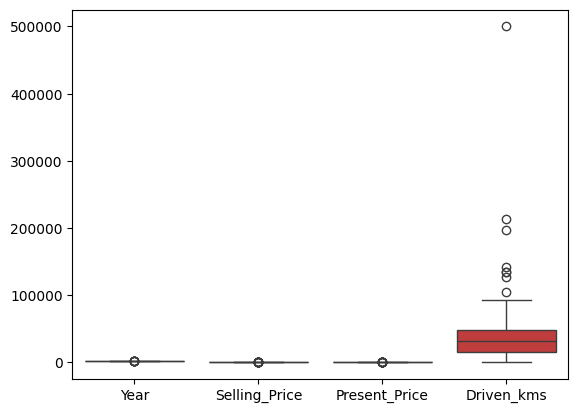

In [12]:
# Detect outliers
import seaborn as sns
sns.boxplot(car_price_df)
plt.show();

In [13]:
# Removed outliers
def remove_outliers(df):
  numeric_cols = car_price_df[['Year','Selling_Price','Present_Price','Driven_kms']]
  Q1 = numeric_cols.quantile(0.25)
  Q2 = numeric_cols.median()
  Q3 = numeric_cols.quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  mask = ~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)
  return df[mask]

In [14]:
car_prices_df = remove_outliers(car_price_df)

In [15]:
car_prices_df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual


# Correlation Matrix

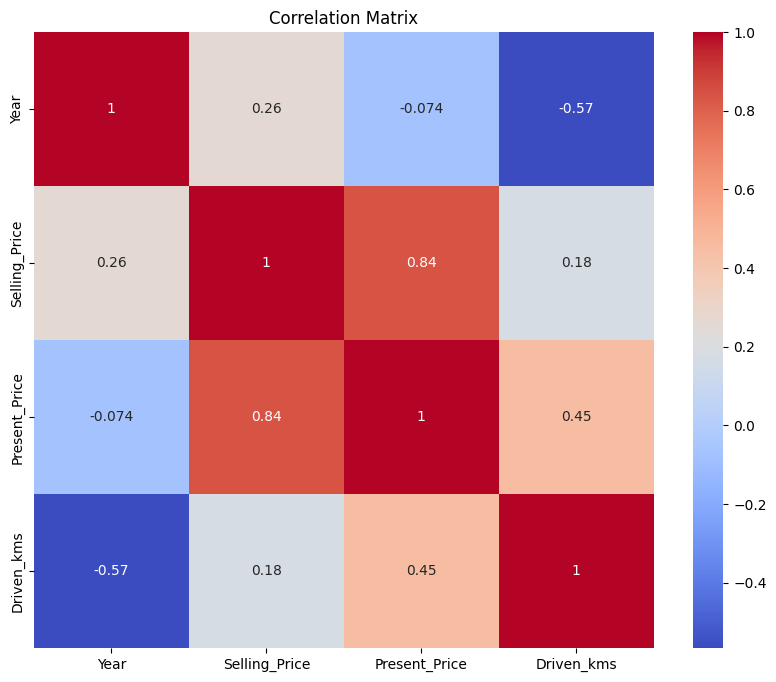

In [16]:
num_cols = car_prices_df[['Year','Selling_Price','Present_Price','Driven_kms']]

plt.figure(figsize=(10,8))
sns.heatmap(num_cols.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();

# ML - Baseline Model

In [17]:
X = car_prices_df.drop(['Present_Price'],axis=1)
y = car_prices_df['Present_Price'].copy()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((219, 7), (55, 7), (219,), (55,))

In [25]:
num_features = X_train.select_dtypes(include=[np.number]).columns
cat_features = X_train.select_dtypes(exclude=[np.number]).columns

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
num_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
])

cat_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

transformer = ColumnTransformer([
    ('num',num_pipeline,num_features),
    ('object',cat_pipeline,cat_features)
],remainder='passthrough')

In [28]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 Index(['Year', 'Selling_Price', 'Driven_kms'], dtype='object')),
                                ('object',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object'))])

In [29]:
X_train_transformer = pd.DataFrame(data=transformer.transform(X_train), columns=transformer.get_feature_names_out())
X_test_transformer = pd.DataFrame(data=transformer.transform(X_test), columns=transformer.get_feature_names_out())

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_transformer,y_train)

LinearRegression()

In [32]:
lin_reg.score(X_train_transformer,y_train), lin_reg.score(X_test_transformer,y_test)

(0.9701768184919225, 0.9520935787369268)

In [33]:
y_pred = lin_reg.predict(X_test_transformer)
y_pred

array([ 5.17025265,  1.0864079 ,  8.37591318,  1.99839824,  8.08416756,
        6.64203734,  7.78759804,  8.91909288, 12.11847473,  7.67883405,
        2.20910796,  2.11121786, 11.3265566 ,  6.84182661,  2.78839824,
        0.42973083,  5.8343066 ,  6.35670969,  1.23176842,  6.60160834,
        4.73437705, 17.41620842,  5.48443096, 12.17669839,  8.81510357,
       10.58671167,  0.23475106,  3.82543506,  9.63574123,  0.98250656,
        9.95238326,  2.01414564,  4.80236654,  1.0203855 ,  1.11180443,
       20.60679753, 13.2001716 , 11.96423147,  9.24342587,  6.6049407 ,
        9.28542481,  3.05725634, 16.51606528,  6.08616682,  1.00589806,
       10.67732774,  7.8346123 , 12.31710952,  1.75029998, 12.733786  ,
        1.6646696 ,  2.66411827, -0.38205411, 10.23992028,  8.51470416])

In [34]:
mean_squared_error(y_pred,y_test)

1.1690791891825134

In [35]:
r2_score(y_pred,y_test)

0.9482217007942426